In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing,SimpleExpSmoothing
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [2]:
df = pd.read_csv('airline-passengers.csv',index_col = 'Month',parse_dates= True)

In [3]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [4]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [5]:
df.index.freq = 'MS'

In [6]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


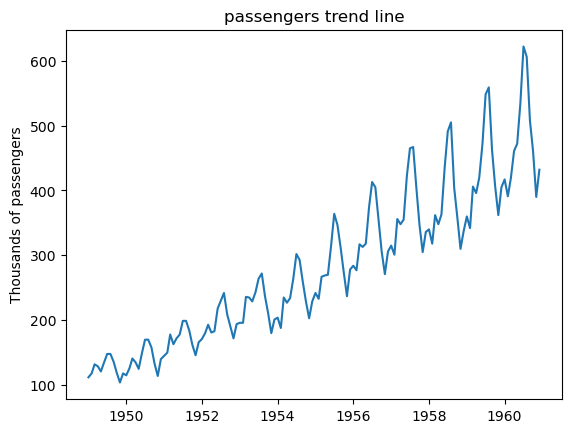

In [8]:
plt.plot(df['Passengers'])
plt.title('passengers trend line')
plt.ylabel('Thousands of passengers')
plt.show()

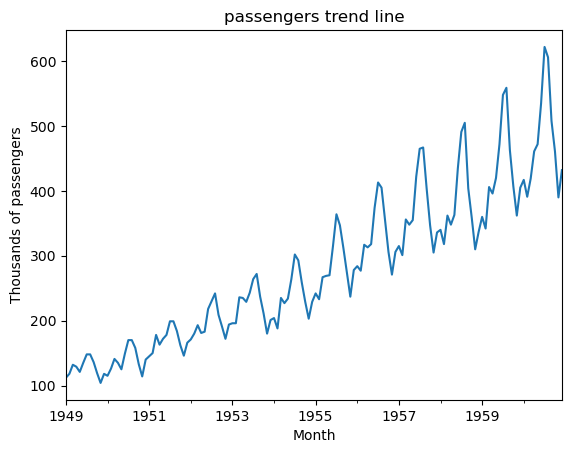

In [9]:
df['Passengers'].plot()
plt.title('passengers trend line')
plt.ylabel('Thousands of passengers')
plt.show()

# ETS decomposition data

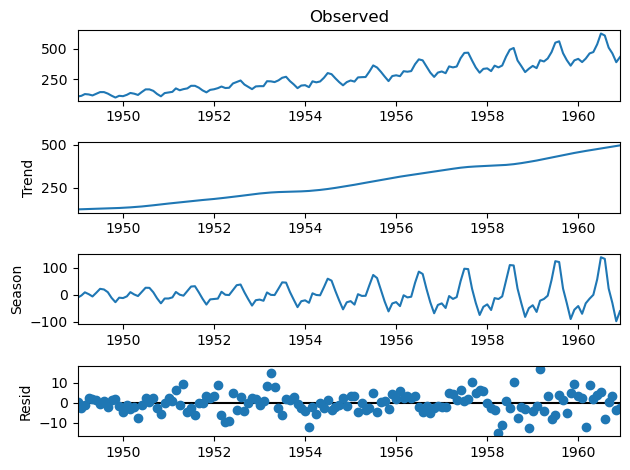

In [10]:
data = STL(df).fit()
data.plot()
plt.show()

# Train test split

In [11]:
train_len = int(len(df)*0.75)
train_len

108

In [12]:
test_len = int(len(df)*0.25)
test_len

36

In [13]:
train = df[:108]
test  = df[108:]

In [14]:
train.shape,test.shape

((108, 1), (36, 1))

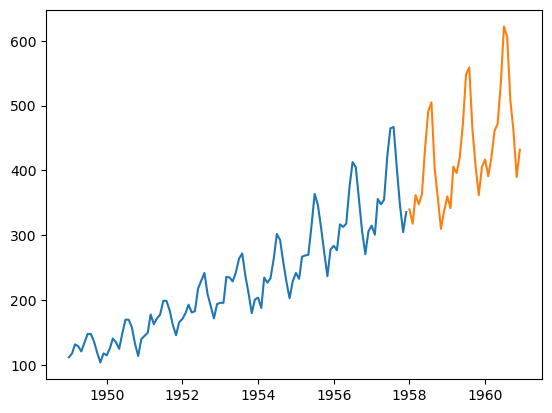

In [15]:
plt.plot(train)
plt.plot(test)

# Build model

### 1.simple Exponential  smoothing

In [16]:
ses_model = SimpleExpSmoothing(train).fit(smoothing_level = 0.2)
ses_model.forecast(test_len)

1958-01-01    362.803041
1958-02-01    362.803041
1958-03-01    362.803041
1958-04-01    362.803041
1958-05-01    362.803041
1958-06-01    362.803041
1958-07-01    362.803041
1958-08-01    362.803041
1958-09-01    362.803041
1958-10-01    362.803041
1958-11-01    362.803041
1958-12-01    362.803041
1959-01-01    362.803041
1959-02-01    362.803041
1959-03-01    362.803041
1959-04-01    362.803041
1959-05-01    362.803041
1959-06-01    362.803041
1959-07-01    362.803041
1959-08-01    362.803041
1959-09-01    362.803041
1959-10-01    362.803041
1959-11-01    362.803041
1959-12-01    362.803041
1960-01-01    362.803041
1960-02-01    362.803041
1960-03-01    362.803041
1960-04-01    362.803041
1960-05-01    362.803041
1960-06-01    362.803041
1960-07-01    362.803041
1960-08-01    362.803041
1960-09-01    362.803041
1960-10-01    362.803041
1960-11-01    362.803041
1960-12-01    362.803041
Freq: MS, dtype: float64

In [17]:
predicted_values = test.copy()
predicted_values['SES'] = ses_model.forecast(36)
predicted_values.head()

,Passengers,SES
Month,,
1958-01-01,340,362.803041
1958-02-01,318,362.803041
1958-03-01,362,362.803041
1958-04-01,348,362.803041
1958-05-01,363,362.803041


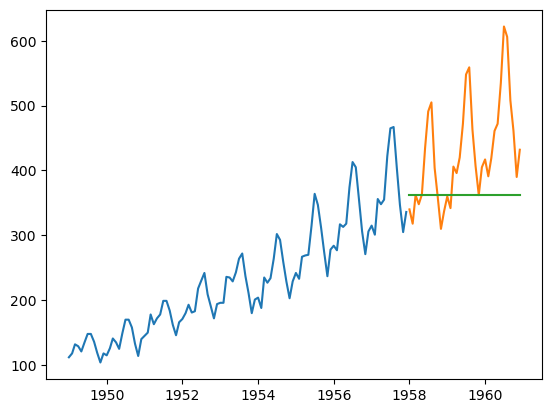

In [18]:
plt.plot(train)
plt.plot(test)
plt.plot(predicted_values['SES'])

This is wrong model for trend line and seasonality

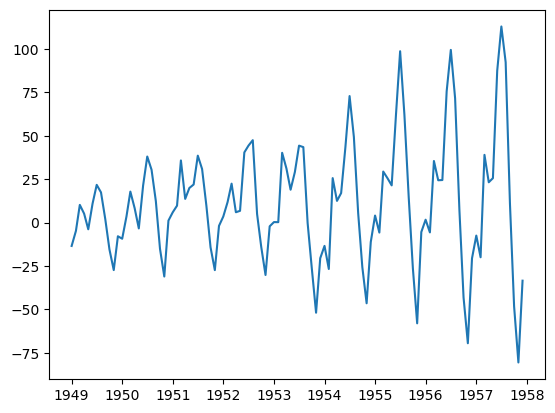

In [19]:
#error ploting
plt.plot(ses_model.resid)

### Metrics

In [20]:
model_residuals = pd.DataFrame(index = ['MSE','RSME','MAE','MAPE'])

In [21]:
mse = mean_squared_error(test,predicted_values['SES'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test,predicted_values['SES'])
mape = mean_absolute_percentage_error(test,predicted_values['SES'])

In [22]:
model_residuals['SES'] = [mse,rmse,mae,mape]
model_residuals

,SES
MSE,10434.395944
RSME,102.148891
MAE,76.254204
MAPE,0.158813


### 2.Double Exponential smoothing

In [23]:
des_trend = ExponentialSmoothing(train,trend = 'add').fit()
res = des_trend.forecast(36)

In [24]:
res

1958-01-01    337.916485
1958-02-01    339.976576
1958-03-01    342.036666
1958-04-01    344.096756
1958-05-01    346.156846
1958-06-01    348.216937
1958-07-01    350.277027
1958-08-01    352.337117
1958-09-01    354.397207
1958-10-01    356.457298
1958-11-01    358.517388
1958-12-01    360.577478
1959-01-01    362.637568
1959-02-01    364.697659
1959-03-01    366.757749
1959-04-01    368.817839
1959-05-01    370.877929
1959-06-01    372.938020
1959-07-01    374.998110
1959-08-01    377.058200
1959-09-01    379.118290
1959-10-01    381.178381
1959-11-01    383.238471
1959-12-01    385.298561
1960-01-01    387.358651
1960-02-01    389.418742
1960-03-01    391.478832
1960-04-01    393.538922
1960-05-01    395.599012
1960-06-01    397.659103
1960-07-01    399.719193
1960-08-01    401.779283
1960-09-01    403.839373
1960-10-01    405.899464
1960-11-01    407.959554
1960-12-01    410.019644
Freq: MS, dtype: float64

In [25]:
predicted_values['des_trend'] = res

In [26]:
predicted_values

,Passengers,SES,des_trend
Month,,,
1958-01-01,340,362.803041,337.916485
1958-02-01,318,362.803041,339.976576
1958-03-01,362,362.803041,342.036666
1958-04-01,348,362.803041,344.096756
1958-05-01,363,362.803041,346.156846
1958-06-01,435,362.803041,348.216937
1958-07-01,491,362.803041,350.277027
1958-08-01,505,362.803041,352.337117
1958-09-01,404,362.803041,354.397207


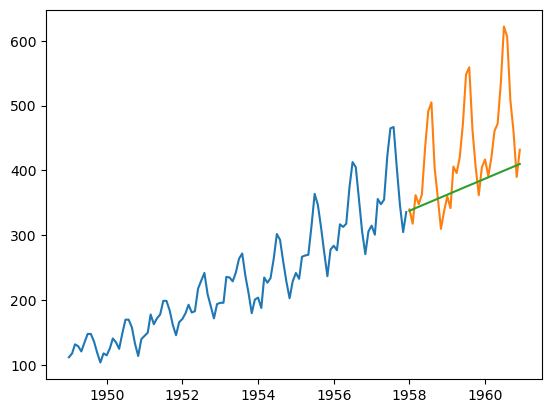

In [27]:
plt.plot(train)
plt.plot(test)
plt.plot(predicted_values['des_trend'])

In [28]:
mse = mean_squared_error(test,predicted_values['des_trend'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test,predicted_values['des_trend'])
mape = mean_absolute_percentage_error(test,predicted_values['des_trend'])
model_residuals['des_trend'] = [mse,rmse,mae,mape]
model_residuals

,SES,des_trend
MSE,10434.395944,7791.631326
RSME,102.148891,88.270218
MAE,76.254204,63.343307
MAPE,0.158813,0.130924


### 3.multiple Trend 

In [29]:
des_multitrend = ExponentialSmoothing(train,trend = 'mul').fit()
res = des_multitrend.forecast(36)

In [30]:
res

1958-01-01    341.706530
1958-02-01    347.641683
1958-03-01    353.679925
1958-04-01    359.823046
1958-05-01    366.072868
1958-06-01    372.431244
1958-07-01    378.900060
1958-08-01    385.481233
1958-09-01    392.176716
1958-10-01    398.988494
1958-11-01    405.918587
1958-12-01    412.969049
1959-01-01    420.141972
1959-02-01    427.439483
1959-03-01    434.863745
1959-04-01    442.416960
1959-05-01    450.101368
1959-06-01    457.919248
1959-07-01    465.872918
1959-08-01    473.964737
1959-09-01    482.197103
1959-10-01    490.572459
1959-11-01    499.093288
1959-12-01    507.762116
1960-01-01    516.581514
1960-02-01    525.554098
1960-03-01    534.682528
1960-04-01    543.969511
1960-05-01    553.417801
1960-06-01    563.030200
1960-07-01    572.809559
1960-08-01    582.758776
1960-09-01    592.880803
1960-10-01    603.178641
1960-11-01    613.655344
1960-12-01    624.314018
Freq: MS, dtype: float64

In [31]:
predicted_values['des_multitrend'] = des_multitrend.forecast(36)

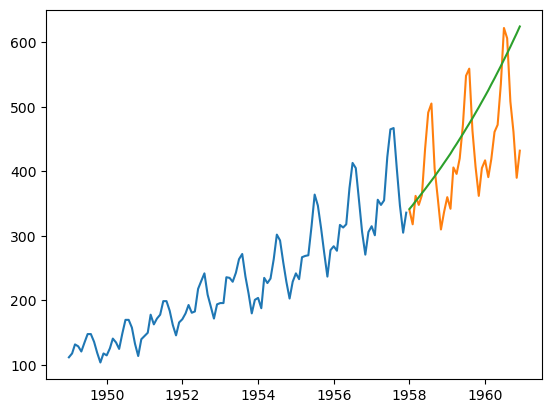

In [32]:
plt.plot(train)
plt.plot(test)
plt.plot(predicted_values['des_multitrend'])

In [33]:
mse = mean_squared_error(test,predicted_values['des_multitrend'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test,predicted_values['des_multitrend'])
mape = mean_absolute_percentage_error(test,predicted_values['des_trend'])
model_residuals['des_multitrend'] = [mse,rmse,mae,mape]
model_residuals

,SES,des_trend,des_multitrend
MSE,10434.395944,7791.631326,7982.134245
RSME,102.148891,88.270218,89.342791
MAE,76.254204,63.343307,72.360522
MAPE,0.158813,0.130924,0.130924


### triple Exponentinal Smoothing

In [34]:
tes_additive = ExponentialSmoothing(train,trend = 'mul',seasonal='add').fit()
res_add = tes_additive.forecast(36)

C:\Users\ygred\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [35]:
predicted_values['tes_additive'] = tes_additive.forecast(36)

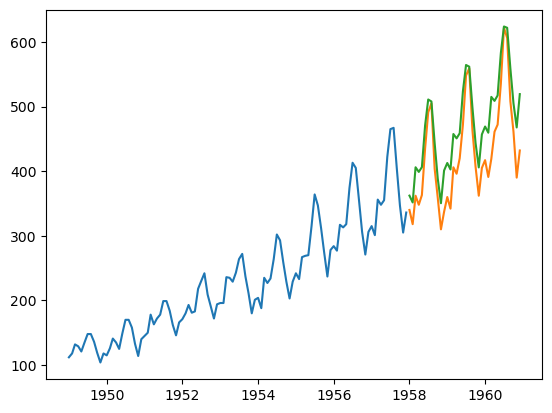

In [36]:
plt.plot(train)
plt.plot(test)
plt.plot(predicted_values['tes_additive'])

In [37]:
mse = mean_squared_error(test,predicted_values['tes_additive'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test,predicted_values['tes_additive'])
mape = mean_absolute_percentage_error(test,predicted_values['tes_additive'])
model_residuals['tes_additive'] = [mse,rmse,mae,mape]
model_residuals

,SES,des_trend,des_multitrend,tes_additive
MSE,10434.395944,7791.631326,7982.134245,2310.815800
RSME,102.148891,88.270218,89.342791,48.070945
MAE,76.254204,63.343307,72.360522,43.241788
MAPE,0.158813,0.130924,0.130924,0.107482


In [38]:
tes_Multiplicative = ExponentialSmoothing(train,trend = 'mul',seasonal='multiplicative').fit()
res_add = tes_Multiplicative.forecast(36)

C:\Users\ygred\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [39]:
predicted_values['tes_Multiplicative'] = tes_Multiplicative.forecast(36)

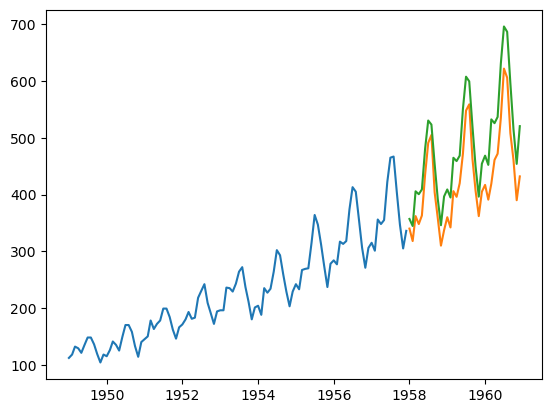

In [40]:
plt.plot(train)
plt.plot(test)
plt.plot(predicted_values['tes_Multiplicative'])

In [41]:
mse = mean_squared_error(test,predicted_values['tes_Multiplicative'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test,predicted_values['tes_Multiplicative'])
mape = mean_absolute_percentage_error(test,predicted_values['tes_Multiplicative'])
model_residuals['tes_Multiplicative'] = [mse,rmse,mae,mape]
model_residuals

,SES,des_trend,des_multitrend,tes_additive,tes_Multiplicative
MSE,10434.395944,7791.631326,7982.134245,2310.815800,3525.891028
RSME,102.148891,88.270218,89.342791,48.070945,59.379214
MAE,76.254204,63.343307,72.360522,43.241788,55.698009
MAPE,0.158813,0.130924,0.130924,0.107482,0.130248


### Rebuild the model

In [42]:
tes_additive_final = ExponentialSmoothing(df,trend = 'mul',seasonal='add').fit()
res_add = tes_additive_final.forecast(test_len)

C:\Users\ygred\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


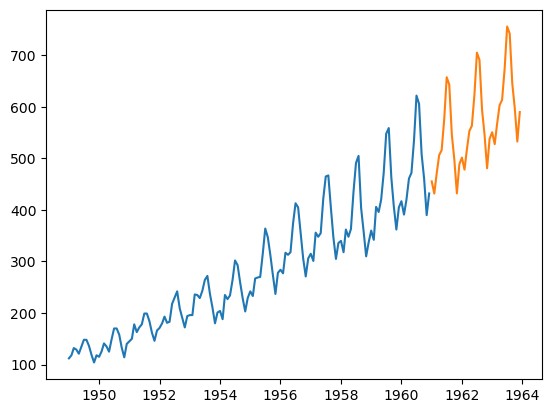

In [43]:
plt.plot(df)
plt.plot(res_add)

In [44]:
#error values
tes_additive_final.resid.mean()

-0.01086259774875684

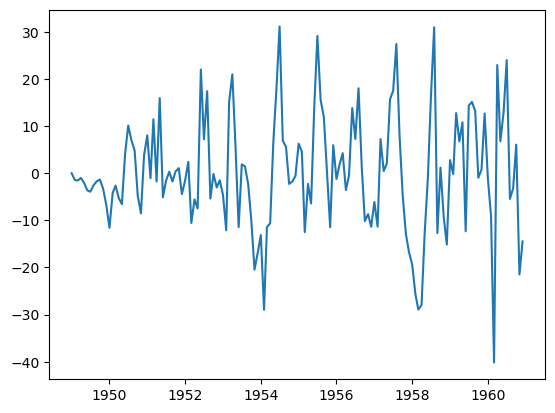

In [45]:
plt.plot(tes_additive_final.resid)

In [46]:
tes_multiplicative_final = ExponentialSmoothing(df,trend = 'mul',seasonal='mul').fit()
res_multiplicative = tes_multiplicative_final.forecast(36)
res_multiplicative

C:\Users\ygred\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


1961-01-01    450.675437
1961-02-01    424.818632
1961-03-01    475.494921
1961-04-01    504.076167
1961-05-01    517.871933
1961-06-01    590.145530
1961-07-01    684.227003
1961-08-01    678.030798
1961-09-01    567.111670
1961-10-01    507.823669
1961-11-01    434.718573
1961-12-01    485.980058
1962-01-01    502.745886
1962-02-01    473.901620
1962-03-01    530.432981
1962-04-01    562.316467
1962-05-01    577.706177
1962-06-01    658.330171
1962-07-01    763.281694
1962-08-01    756.369587
1962-09-01    632.635008
1962-10-01    566.496950
1962-11-01    484.945387
1962-12-01    542.129557
1963-01-01    560.832487
1963-02-01    528.655592
1963-03-01    591.718512
1963-04-01    627.285774
1963-05-01    644.453592
1963-06-01    734.392776
1963-07-01    851.470260
1963-08-01    843.759538
1963-09-01    705.728828
1963-10-01    631.949264
1963-11-01    540.975341
1963-12-01    604.766495
Freq: MS, dtype: float64

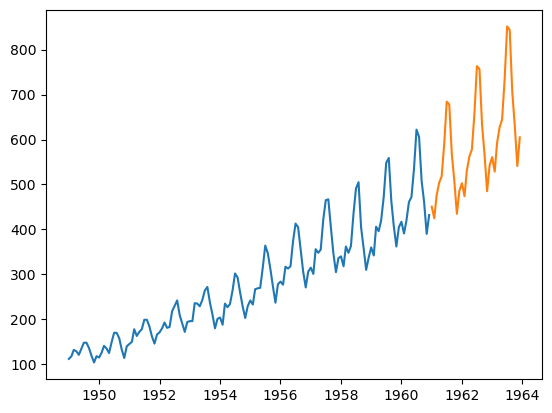

In [47]:
plt.plot(df)
plt.plot(res_multiplicative)

In [48]:
tes_multiplicative_final.resid.mean()

0.3084449752397064

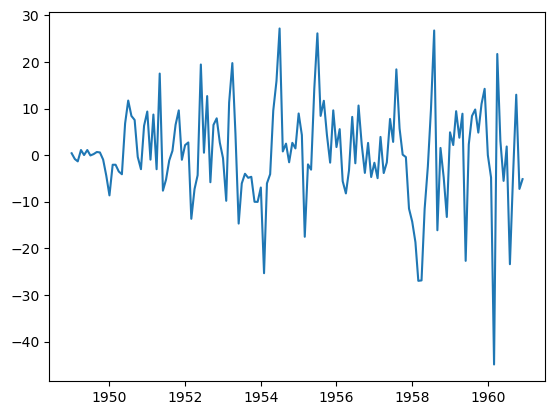

In [49]:
plt.plot(tes_multiplicative_final.resid)

(array([ 1.,  0.,  4.,  4.,  9., 37., 48., 29.,  8.,  4.]),
 array([-44.91671006, -37.70721622, -30.49772237, -23.28822852,
        -16.07873467,  -8.86924083,  -1.65974698,   5.54974687,
         12.75924072,  19.96873456,  27.17822841]),
 <BarContainer object of 10 artists>)

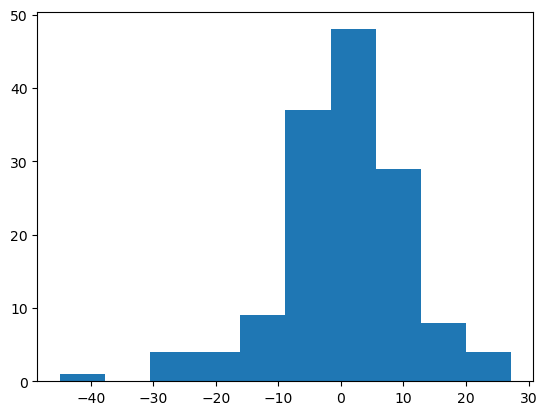

In [50]:
plt.hist(tes_multiplicative_final.resid )

# ARIMA MODEL

In [51]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [52]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [53]:
df.index.freq = 'MS'

In [54]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [55]:
df['% p'] = df['Passengers'].pct_change(periods = 1)*100

In [56]:
df.head()

,Passengers,% p
Month,,
1949-01-01,112,NaN
1949-02-01,118,5.357143
1949-03-01,132,11.864407
1949-04-01,129,-2.272727
1949-05-01,121,-6.201550


In [57]:
df.dropna(inplace = True)

In [58]:
df

,Passengers,% p
Month,,
1949-02-01,118,5.357143
1949-03-01,132,11.864407
1949-04-01,129,-2.272727
1949-05-01,121,-6.201550
1949-06-01,135,11.570248
...,...,...
1960-08-01,606,-2.572347
1960-09-01,508,-16.171617
1960-10-01,461,-9.251969


### ETS Decomposition

In [59]:
from statsmodels.tsa.seasonal import STL

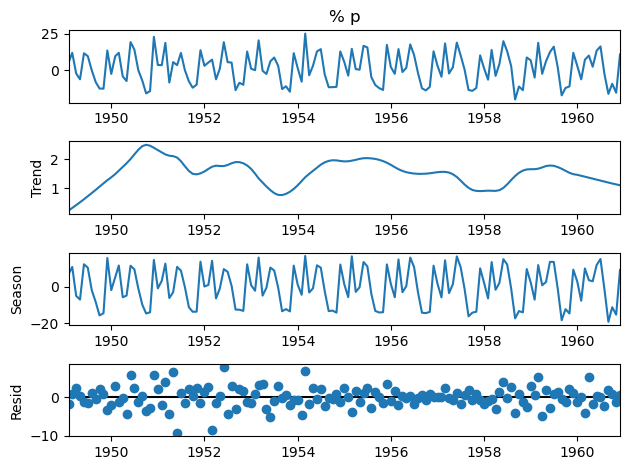

In [60]:
ets = STL(df['% p']).fit()
ets.plot()
plt.show()

### checking the stationarity - Augumented Dickey fuller Test

In [61]:
from statsmodels.tsa.stattools import adfuller

In [63]:
#p value
adfuller(df['% p'])[1]

0.04239503972523889

In [64]:
def adf_test(data):
    if adfuller(data)[1] > 0.05:
        print('Data is not stationery')
    else:
        print('Data is stationery')

In [65]:
adf_test(df['% p'])

Data is stationery


### Find order of  AR and MA

### use PACF and ACF Plot

In [66]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\ygred\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


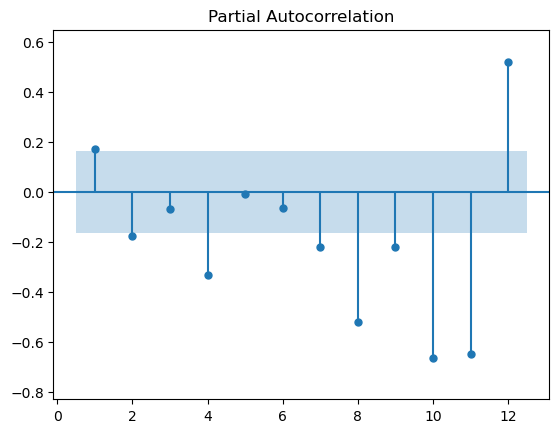

In [67]:
plot_pacf(df['% p'],lags = 12,zero = False, auto_ylims = True);

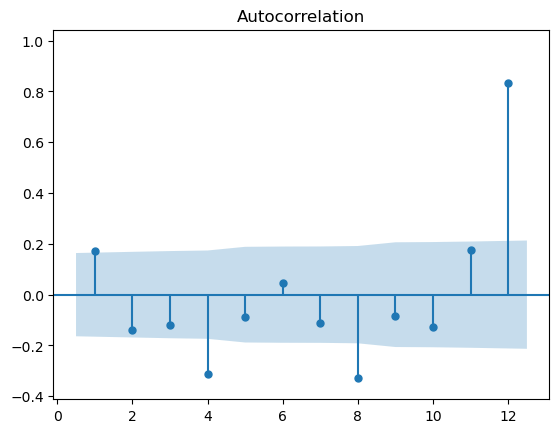

In [68]:
plot_acf(df['% p'],lags = 12,zero = False, auto_ylims = True);

### Use pmdarima

In [ ]:
!pip install pmdarima

In [69]:
from pmdarima import auto_arima

In [87]:
best_model = auto_arima(df['% p'],start_P=0,start_q=0,max_p=6,max_d=2,max_q=6,trace=True,seasonal = False)

Performing stepwise search to minimize aic
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1084.419, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1089.152, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1086.124, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1084.216, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1079.188, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1078.474, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1080.200, Time=0.19 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1078.408, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1078.826, Time=0.11 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1076.937, Time=0.15 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=1074.159, Time=0.24 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=1076.537, Time=0.13 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=1076.124, Time=0.32 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=0.59 sec
 ARIMA(3,0,3)(0,0,0)[0]             : 

In [73]:
print(train_len)
print(test_len)

108
36


In [82]:
train_df = df[:108]
train_df

,Passengers,% p
Month,,
1949-02-01,118,5.357143
1949-03-01,132,11.864407
1949-04-01,129,-2.272727
1949-05-01,121,-6.201550
1949-06-01,135,11.570248
...,...,...
1957-09-01,404,-13.490364
1957-10-01,347,-14.108911
1957-11-01,305,-12.103746


In [83]:
test_df = df[108:]
test_df

,Passengers,% p
Month,,
1958-02-01,318,-6.470588
1958-03-01,362,13.836478
1958-04-01,348,-3.867403
1958-05-01,363,4.310345
1958-06-01,435,19.834711
1958-07-01,491,12.873563
1958-08-01,505,2.851324
1958-09-01,404,-20.000000
1958-10-01,359,-11.138614


In [85]:
print(train_df.shape)
print(test_df.shape)

(108, 2)
(35, 2)


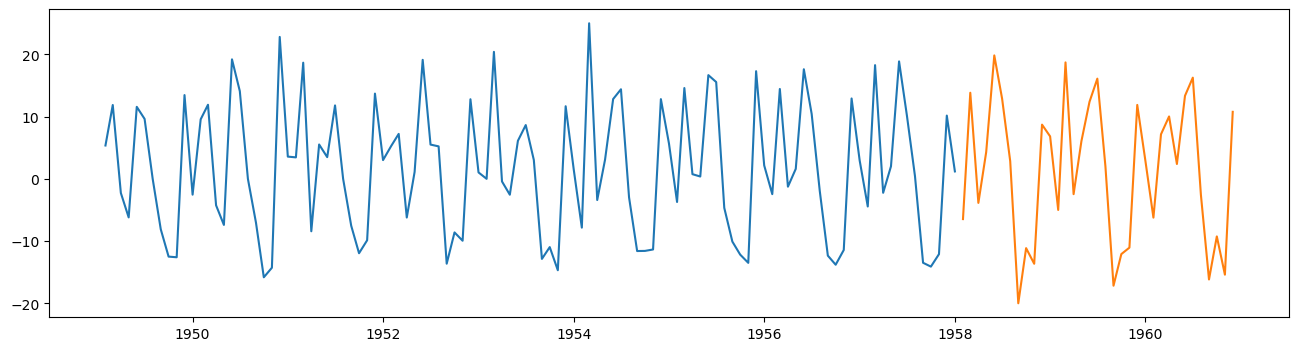

In [89]:
plt.figure(figsize = (16,4))
plt.plot(train_df['% p'])
plt.plot(test_df['% p'])
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [90]:
model = ARIMA(train_df['% p'],order = (4,0,2)).fit()

C:\Users\ygred\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [104]:
ts_pred  =model.predict(train_len,len(df)-1)
ts_pred

1958-02-01     7.945294
1958-03-01    12.614360
1958-04-01     3.788544
1958-05-01     2.964374
1958-06-01     0.427827
1958-07-01    -2.212396
1958-08-01    -0.655365
1958-09-01     0.189772
1958-10-01     1.330906
1958-11-01     2.666182
1958-12-01     2.781260
1959-01-01     2.603867
1959-02-01     2.192145
1959-03-01     1.601731
1959-04-01     1.305820
1959-05-01     1.220207
1959-06-01     1.299569
1959-07-01     1.511375
1959-08-01     1.693532
1959-09-01     1.802040
1959-10-01     1.829122
1959-11-01     1.778957
1959-12-01     1.702883
1960-01-01     1.636366
1960-02-01     1.597817
1960-03-01     1.594959
1960-04-01     1.615896
1960-05-01     1.644920
1960-06-01     1.669531
1960-07-01     1.681618
1960-08-01     1.681023
1960-09-01     1.672265
1960-10-01     1.661043
1960-11-01     1.652369
1960-12-01     1.648574
Freq: MS, Name: predicted_mean, dtype: float64

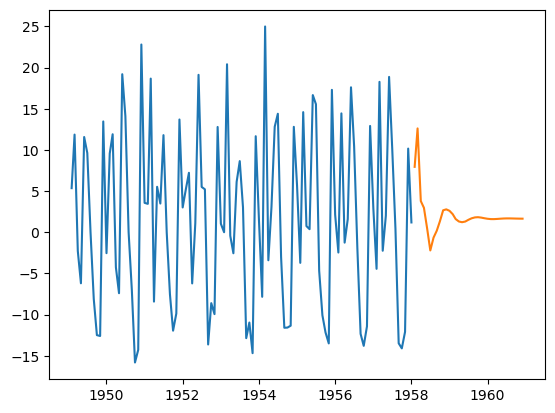

In [105]:
plt.plot(train_df['% p'])
plt.plot(ts_pred)
plt.show()

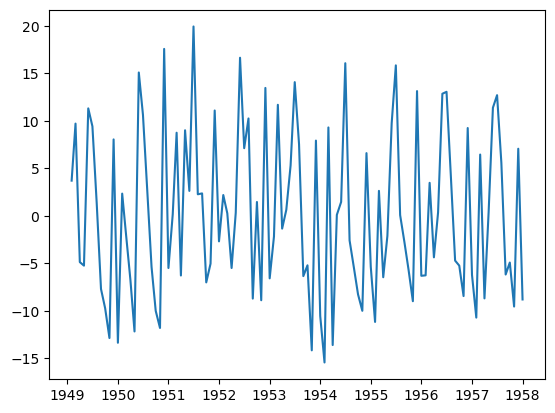

In [106]:
plt.plot(model.resid)
plt.show()

In [102]:
model.resid.mean()

0.20281868485627144

In [107]:
mse = mean_squared_error(test_df['% p'],ts_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_df['% p'],ts_pred)
mape = mean_absolute_percentage_error(test_df['% p'],ts_pred)
print(mse)
print(rmse)
print(mae)
print(mape)

132.93131860152369
11.529584493880241
9.882575157201067
0.9947826279813056


In [108]:
model = ARIMA(df['% p'],order = (4,0,2)).fit()

C:\Users\ygred\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [109]:
fn_pred  =model.predict(len(df),len(df)+test_len)
fn_pred

1961-01-01    13.935112
1961-02-01     6.770021
1961-03-01     9.713203
1961-04-01     0.555369
1961-05-01    -0.380336
1961-06-01    -1.591554
1961-07-01    -1.743997
1961-08-01     0.542065
1961-09-01     1.369119
1961-10-01     2.548605
1961-11-01     2.770507
1961-12-01     2.412904
1962-01-01     2.024240
1962-02-01     1.487503
1962-03-01     1.252896
1962-04-01     1.200858
1962-05-01     1.299871
1962-06-01     1.483907
1962-07-01     1.620973
1962-08-01     1.703033
1962-09-01     1.707705
1962-10-01     1.663522
1962-11-01     1.607433
1962-12-01     1.560127
1963-01-01     1.538924
1963-02-01     1.540557
1963-03-01     1.556439
1963-04-01     1.575944
1963-05-01     1.590087
1963-06-01     1.596029
1963-07-01     1.594367
1963-08-01     1.588511
1963-09-01     1.582171
1963-10-01     1.577784
1963-11-01     1.576298
1963-12-01     1.577180
1964-01-01     1.579253
Freq: MS, Name: predicted_mean, dtype: float64

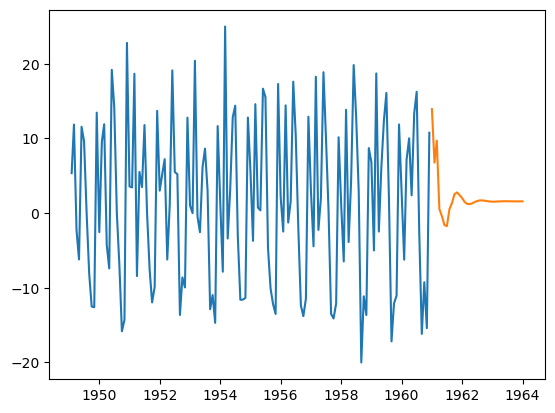

In [110]:
plt.plot(df['% p'])
plt.plot(fn_pred)
plt.show()

# SARIMA MODEL

In [113]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [114]:
best_model = auto_arima(df['Passengers'],start_P=0,start_q=0,max_p=6,max_d=2,max_q=6,trace=True,seasonal = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1389.247, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1406.392, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1394.697, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1390.082, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1405.001, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1387.445, Time=0.15 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1379.883, Time=0.22 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1381.869, Time=0.31 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1376.225, Time=0.44 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=1377.288, Time=0.57 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=1375.438, T

In [122]:
model = SARIMAX(train_df['Passengers'],order = (4,1,3),seasonal_order  = (4,1,3,12)).fit()

C:\Users\ygred\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\ygred\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [132]:
ts_sar = model.predict(start= 108, end=142)
ts_sar

1958-02-01    323.461427
1958-03-01    377.304810
1958-04-01    373.116855
1958-05-01    384.536069
1958-06-01    451.900728
1958-07-01    496.834815
1958-08-01    494.745899
1958-09-01    432.902307
1958-10-01    376.949043
1958-11-01    331.623347
1958-12-01    365.294069
1959-01-01    373.768242
1959-02-01    355.323674
1959-03-01    412.606190
1959-04-01    407.787234
1959-05-01    419.947610
1959-06-01    492.767569
1959-07-01    543.004621
1959-08-01    536.789261
1959-09-01    470.268011
1959-10-01    412.233589
1959-11-01    365.009599
1959-12-01    401.076204
1960-01-01    409.459885
1960-02-01    388.141743
1960-03-01    450.308023
1960-04-01    446.142881
1960-05-01    458.412891
1960-06-01    537.457471
1960-07-01    592.492938
1960-08-01    585.097781
1960-09-01    512.819151
1960-10-01    449.621664
1960-11-01    399.980896
1960-12-01    438.991792
Freq: MS, Name: predicted_mean, dtype: float64

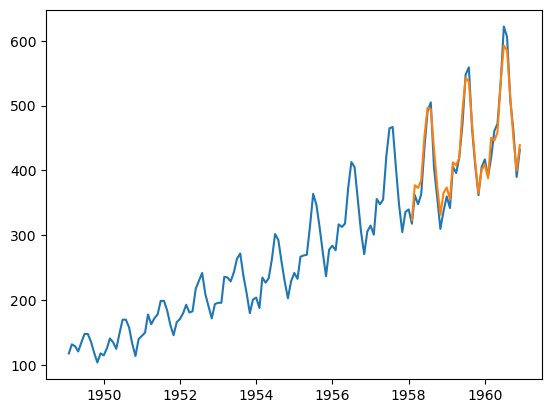

In [133]:
plt.plot(df['Passengers'])
plt.plot(ts_sar)
plt.show()

In [134]:
mse = mean_squared_error(test_df['Passengers'],ts_sar)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_df['Passengers'],ts_sar)
mape = mean_absolute_percentage_error(test_df['Passengers'],ts_sar)
print(mse)
print(rmse)
print(mae)
print(mape)

253.6698583084834
15.92701661669515
13.323186651979828
0.03210325636842234


In [137]:
model = SARIMAX(df['Passengers'],order = (4,1,3),seasonal_order  = (4,1,3,12)).fit()
fn_sar = model.predict(start= 144, end= 144+36)
fn_sar

C:\Users\ygred\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ygred\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\ygred\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\ygred\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1961-02-01    415.707382
1961-03-01    468.911531
1961-04-01    498.234137
1961-05-01    500.864958
1961-06-01    578.468180
1961-07-01    669.745539
1961-08-01    650.837155
1961-09-01    552.642475
1961-10-01    500.485870
1961-11-01    421.063263
1961-12-01    472.008254
1962-01-01    496.724267
1962-02-01    445.113724
1962-03-01    507.164538
1962-04-01    530.564950
1962-05-01    532.413523
1962-06-01    624.282027
1962-07-01    718.105569
1962-08-01    699.026575
1962-09-01    593.899535
1962-10-01    536.736026
1962-11-01    452.558210
1962-12-01    510.272823
1963-01-01    536.180494
1963-02-01    480.381937
1963-03-01    553.882435
1963-04-01    577.028220
1963-05-01    579.985937
1963-06-01    676.433489
1963-07-01    774.847304
1963-08-01    754.378794
1963-09-01    647.728929
1963-10-01    581.733637
1963-11-01    493.142652
1963-12-01    558.538918
1964-01-01    578.993677
1964-02-01    518.748498
Freq: MS, Name: predicted_mean, dtype: float64

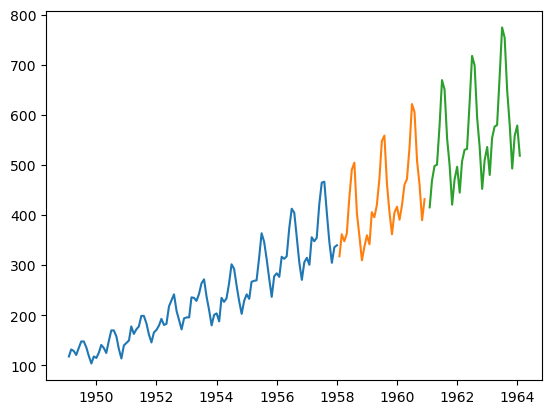

In [140]:
plt.plot(train_df['Passengers'])
plt.plot(test_df['Passengers'])
plt.plot(fn_sar)
plt.show()

In [139]:
fn_sar

1961-02-01    415.707382
1961-03-01    468.911531
1961-04-01    498.234137
1961-05-01    500.864958
1961-06-01    578.468180
1961-07-01    669.745539
1961-08-01    650.837155
1961-09-01    552.642475
1961-10-01    500.485870
1961-11-01    421.063263
1961-12-01    472.008254
1962-01-01    496.724267
1962-02-01    445.113724
1962-03-01    507.164538
1962-04-01    530.564950
1962-05-01    532.413523
1962-06-01    624.282027
1962-07-01    718.105569
1962-08-01    699.026575
1962-09-01    593.899535
1962-10-01    536.736026
1962-11-01    452.558210
1962-12-01    510.272823
1963-01-01    536.180494
1963-02-01    480.381937
1963-03-01    553.882435
1963-04-01    577.028220
1963-05-01    579.985937
1963-06-01    676.433489
1963-07-01    774.847304
1963-08-01    754.378794
1963-09-01    647.728929
1963-10-01    581.733637
1963-11-01    493.142652
1963-12-01    558.538918
1964-01-01    578.993677
1964-02-01    518.748498
Freq: MS, Name: predicted_mean, dtype: float64

In [141]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  143
Model:             SARIMAX(4, 1, 3)x(4, 1, 3, 12)   Log Likelihood                -486.279
Date:                            Tue, 31 Oct 2023   AIC                           1002.557
Time:                                    11:51:06   BIC                           1045.570
Sample:                                02-01-1949   HQIC                          1020.035
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3436      0.117     -2.934      0.003      -0.573      -0.114
ar.L2         -0.1320      0.115     -1.151      0.250      -0.357       0.093
ar.L3          0.7818      0.133      5.864      0.000       0.521       1.043
ar.L4          0.0896      0.130      0.689      0.491      -0.165       0.344
ma.L1         -0.0554      1.481     -0.037      0.970      -2.958       2.847
ma.L2          0.0871      1.754      0.050      0.960      -3.350       3.524
ma.L3         -0.9821      3.294     -0.298      0.766      -7.439       5.475
ar.S.L12       0.1198      0.707      0.169      0.865      -1.266       1.505
ar.S.L24       0.7410      0.500      1.481      0.139      -0.240       1.722
ar.S.L36      -0.0553      0.830     -0.067      0.947      -1.682       1.572
ar.S.L48       0.1819      0.293      0.622      0.534      -0.392       0.756
ma.S.L12      -0.5562      0.668     -0.832      0.405      -1.866       0.754
ma.S.L24      -0.7456      0.765     -0.974      0.330      -2.245       0.754
ma.S.L36       0.4282      0.855      0.501      0.616      -1.247       2.103
sigma2        80.1765    277.815      0.289      0.773    -464.331     624.684
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 6.62
Prob(Q):                              0.80   Prob(JB):                         0.04
Heteroskedasticity (H):               2.30   Skew:                             0.20
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""